#### Rotating Images

#### Euqalization

In [ ]:
import os
import cv2

# Function to perform histogram equalization and adaptive histogram equalization
def perform_histogram_equalization(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    total_images = 0  # Counter for total number of images

    # Iterate through each class folder
    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        # Skip if it's not a directory
        if not os.path.isdir(class_folder):
            print(f"Skipping {class_folder} as it's not a directory")
            continue
        # Create new folders for processed images
        os.makedirs(os.path.join(output_folder, class_name, "histogram_equalized", "left"), exist_ok=True)
        os.makedirs(os.path.join(output_folder, class_name, "histogram_equalized", "right"), exist_ok=True)
        os.makedirs(os.path.join(output_folder, class_name, "adaptive_histogram_equalized", "left"), exist_ok=True)
        os.makedirs(os.path.join(output_folder, class_name, "adaptive_histogram_equalized", "right"), exist_ok=True)
        # Iterate through items in class folder
        for subfolder_name in os.listdir(class_folder):
            subfolder_path = os.path.join(class_folder, subfolder_name)
            if not os.path.isdir(subfolder_path):
                continue
            if subfolder_name not in ['left', 'right']:
                continue
            # Iterate through images in subfolder
            for item_name in os.listdir(subfolder_path):
                item_path = os.path.join(subfolder_path, item_name)
                # Skip if it's not a file
                if not os.path.isfile(item_path):
                    print(f"Skipping {item_path} as it's not a file")
                    continue
                # Skip if it's a .DS_Store file
                if item_name.startswith('.DS_Store'):
                    continue
                print(f"Processing {item_name} in class {class_name} - {subfolder_name}...")
                # Read image
                img = cv2.imread(item_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Error: Unable to read image {item_name} in class {class_name}")
                    continue
                # Perform histogram equalization
                hist_equalized_img = cv2.equalizeHist(img)
                if hist_equalized_img is None:
                    print(f"Error: Unable to perform histogram equalization on {item_name} in class {class_name}")
                    continue
                # Perform adaptive histogram equalization
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                adaptive_hist_equalized_img = clahe.apply(img)
                if adaptive_hist_equalized_img is None:
                    print(f"Error: Unable to perform adaptive histogram equalization on {item_name} in class {class_name}")
                    continue
                # Write processed images to new folders
                output_folder_name = "left" if subfolder_name == "left" else "right"
                output_path_hist_equalized = os.path.join(output_folder, class_name, "histogram_equalized", output_folder_name, "hist_equalized_" + item_name)
                output_path_adaptive_hist_equalized = os.path.join(output_folder, class_name, "adaptive_histogram_equalized", output_folder_name, "adaptive_hist_equalized_" + item_name)
                if cv2.imwrite(output_path_hist_equalized, hist_equalized_img):
                    print(f"Successfully saved histogram equalized image: {output_path_hist_equalized}")
                    total_images += 1
                else:
                    print(f"Failed to save histogram equalized image: {output_path_hist_equalized}")
                if cv2.imwrite(output_path_adaptive_hist_equalized, adaptive_hist_equalized_img):
                    print(f"Successfully saved adaptive histogram equalized image: {output_path_adaptive_hist_equalized}")
                    total_images += 1
                else:
                    print(f"Failed to save adaptive histogram equalized image: {output_path_adaptive_hist_equalized}")

    return total_images

# Define input and output folders
input_folder = "Rotated_Plants_Dataset"
output_folder = "Processed_Plants_Dataset"

# Call function to perform histogram equalization and adaptive histogram equalization
total_images = perform_histogram_equalization(input_folder, output_folder)

print(f"Total number of images after processing: {total_images}")


Processing rotated_right_images93.jpg in class Rosary_Pea - right...
Successfully saved histogram equalized image: Processed_Plants_Dataset/Rosary_Pea/histogram_equalized/right/hist_equalized_rotated_right_images93.jpg
Successfully saved adaptive histogram equalized image: Processed_Plants_Dataset/Rosary_Pea/adaptive_histogram_equalized/right/adaptive_hist_equalized_rotated_right_images93.jpg
Processing rotated_right_flipped_images90.jpg in class Rosary_Pea - right...
Successfully saved histogram equalized image: Processed_Plants_Dataset/Rosary_Pea/histogram_equalized/right/hist_equalized_rotated_right_flipped_images90.jpg
Successfully saved adaptive histogram equalized image: Processed_Plants_Dataset/Rosary_Pea/adaptive_histogram_equalized/right/adaptive_hist_equalized_rotated_right_flipped_images90.jpg
Processing rotated_right_flipped_images126.jpg in class Rosary_Pea - right...
Successfully saved histogram equalized image: Processed_Plants_Dataset/Rosary_Pea/histogram_equalized/righ

### CNN + Quantization 

In [22]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load images and labels
def load_data(input_folder):
    images = []
    labels = []
    label_to_index = {}
    index_to_label = {}
    class_count = 0

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            label_to_index[class_name] = class_count
            index_to_label[class_count] = class_name
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    img_path = os.path.join(class_folder, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(class_count)
            class_count += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_to_index, index_to_label

# Define paths
input_folder = "Rotated_Plants_Dataset_Copy"  # Assuming you're currently in the "Downloads" folder

# Load data
images, labels, label_to_index, index_to_label = load_data(input_folder)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_to_index), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Save the model to Downloads folder
save_path = "my_saved_model"
model.save(save_path)

# Convert the model to a quantized version
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()

# Save the quantized model to disk
quantized_model_path = "quantized_model.tflite"
with open(quantized_model_path, "wb") as f:
    f.write(quantized_tflite_model)

print("Model saved to:", save_path)
print("Quantized model saved to:", quantized_model_path)


Epoch 1/10
625/625 [==============================] - 23s 36ms/step - loss: 1.8996 - accuracy: 0.3161 - val_loss: 1.5888 - val_accuracy: 0.4481
Epoch 2/10
625/625 [==============================] - 22s 35ms/step - loss: 1.4505 - accuracy: 0.5064 - val_loss: 1.3448 - val_accuracy: 0.5427
Epoch 3/10
625/625 [==============================] - 23s 36ms/step - loss: 1.0496 - accuracy: 0.6547 - val_loss: 0.9661 - val_accuracy: 0.6864
Epoch 4/10
625/625 [==============================] - 24s 38ms/step - loss: 0.6570 - accuracy: 0.7901 - val_loss: 0.7224 - val_accuracy: 0.7733
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 0.3382 - accuracy: 0.8971 - val_loss: 0.6428 - val_accuracy: 0.8178
Epoch 6/10
625/625 [==============================] - 25s 40ms/step - loss: 0.1902 - accuracy: 0.9438 - val_loss: 0.6044 - val_accuracy: 0.8562
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 0.1162 - accuracy: 0.9670 - val_loss: 0.5466 - val_accuracy:

INFO:tensorflow:Assets written to: my_saved_model/assets


Model saved to: my_saved_model
Quantized model saved to: quantized_model.tflite


2024-05-10 13:29:33.025850: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-10 13:29:33.026045: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-10 13:29:33.026695: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: my_saved_model
2024-05-10 13:29:33.027565: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-10 13:29:33.027570: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: my_saved_model
2024-05-10 13:29:33.029403: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-05-10 13:29:33.030166: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-05-10 13:29:33.074483: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: my_saved_model
2024-05-10 13

In [24]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Load images and labels
def load_data(input_folder):
    images = []
    labels = []
    label_to_index = {}
    index_to_label = {}
    class_count = 0

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            label_to_index[class_name] = class_count
            index_to_label[class_count] = class_name
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    img_path = os.path.join(class_folder, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(class_count)
            class_count += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_to_index, index_to_label

# Define paths
input_folder = "Rotated_Plants_Dataset_Copy"  # Assuming you're currently in the "Downloads" folder

# Load data
images, labels, label_to_index, index_to_label = load_data(input_folder)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_to_index), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Predict classes
y_pred = model.predict_classes(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("Area Under the Curve (AUC):", roc_auc)


Epoch 1/10
625/625 [==============================] - 22s 34ms/step - loss: 1.8813 - accuracy: 0.3332 - val_loss: 1.6137 - val_accuracy: 0.4409
Epoch 2/10
625/625 [==============================] - 22s 35ms/step - loss: 1.4271 - accuracy: 0.5157 - val_loss: 1.2690 - val_accuracy: 0.5599
Epoch 3/10
625/625 [==============================] - 23s 36ms/step - loss: 1.0167 - accuracy: 0.6610 - val_loss: 1.0324 - val_accuracy: 0.6620
Epoch 4/10
625/625 [==============================] - 25s 40ms/step - loss: 0.6492 - accuracy: 0.7921 - val_loss: 0.8391 - val_accuracy: 0.7405
Epoch 5/10
625/625 [==============================] - 25s 40ms/step - loss: 0.3810 - accuracy: 0.8818 - val_loss: 0.6935 - val_accuracy: 0.7938
Epoch 6/10
625/625 [==============================] - 25s 40ms/step - loss: 0.2156 - accuracy: 0.9362 - val_loss: 0.6693 - val_accuracy: 0.8278
Epoch 7/10
625/625 [==============================] - 25s 39ms/step - loss: 0.1547 - accuracy: 0.9553 - val_loss: 0.5514 - val_accuracy:

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [31]:

# Predict probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


79/79 [==============================] - 1s 10ms/step
Accuracy: 0.9066880256307569

Precision: 0.9083085027395449

Recall: 0.9066880256307569

F1-score: 0.9070243148620559

Confusion Matrix:
[[114   0   0   2   0   2   1   1   0   0]
 [  1 246   4   1   0   2   2   1   3   2]
 [  3   3 246   2   4   7   8   8   0   2]
 [  1   0   1 134   2   4   0   2   0   5]
 [  0   1   4   2 251   3  11   0   9   5]
 [  2   0   1   1   3 179   7   3   4   0]
 [  0   0   1   4   8   6 255   3   3   0]
 [  0   0   4   0  11  11   1 280   7   2]
 [  0   1   4   1   6   2   2   1 287   2]
 [  3   0   2   3   4   5   2   0   4 272]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       120
           1       0.98      0.94      0.96       262
           2       0.92      0.87      0.89       283
           4       0.89      0.90      0.90       149
           5       0.87      0.88      0.87       286
           6       0.81      

79/79 [==============================] - 1s 9ms/step


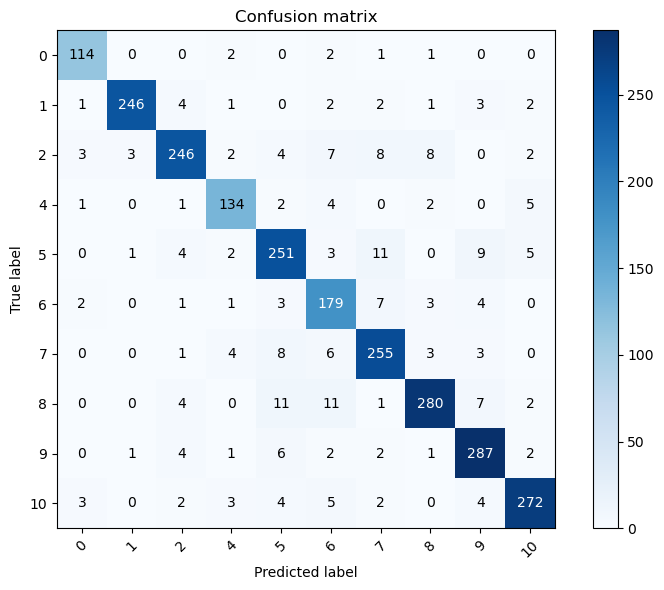

Accuracy: 0.9066880256307569

Precision: 0.9083085027395449

Recall: 0.9066880256307569

F1-score: 0.9070243148620559

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       120
           1       0.98      0.94      0.96       262
           2       0.92      0.87      0.89       283
           4       0.89      0.90      0.90       149
           5       0.87      0.88      0.87       286
           6       0.81      0.90      0.85       200
           7       0.88      0.91      0.90       280
           8       0.94      0.89      0.91       316
           9       0.91      0.94      0.92       306
          10       0.94      0.92      0.93       295

    accuracy                           0.91      2497
   macro avg       0.91      0.91      0.91      2497
weighted avg       0.91      0.91      0.91      2497



In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

# Predict probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualize the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

# Define class labels
class_labels = np.unique(y_test)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_labels)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-score:", f1)
print("\nClassification Report:")
print(class_report)


79/79 [==============================] - 1s 9ms/step


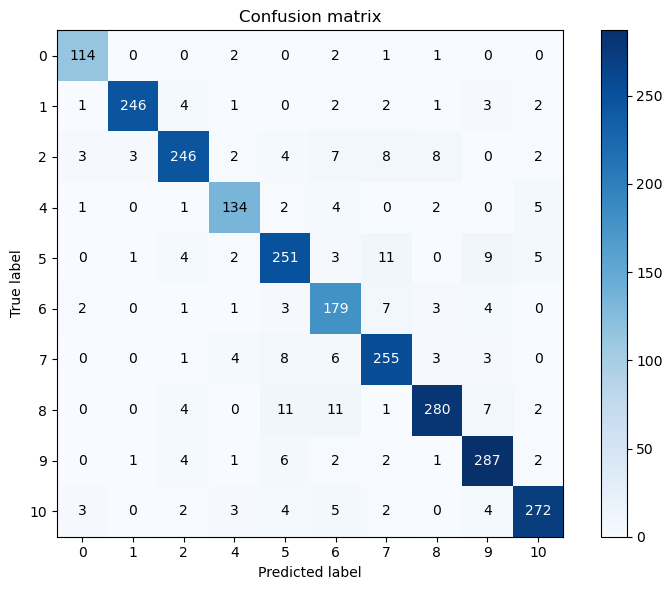

Accuracy: 0.9066880256307569

Precision: 0.9083085027395449

Recall: 0.9066880256307569

F1-score: 0.9070243148620559

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       120
           1       0.98      0.94      0.96       262
           2       0.92      0.87      0.89       283
           4       0.89      0.90      0.90       149
           5       0.87      0.88      0.87       286
           6       0.81      0.90      0.85       200
           7       0.88      0.91      0.90       280
           8       0.94      0.89      0.91       316
           9       0.91      0.94      0.92       306
          10       0.94      0.92      0.93       295

    accuracy                           0.91      2497
   macro avg       0.91      0.91      0.91      2497
weighted avg       0.91      0.91      0.91      2497



In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

# Predict probabilities
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualize the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

# Define class labels
class_labels = np.unique(y_test)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_labels)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-score:", f1)
print("\nClassification Report:")
print(class_report)


In [36]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load images and labels
def load_data(input_folder):
    images = []
    labels = []
    label_to_index = {}
    index_to_label = {}
    class_count = 0

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            label_to_index[class_name] = class_count
            index_to_label[class_count] = class_name
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    img_path = os.path.join(class_folder, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(class_count)
            class_count += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_to_index, index_to_label

# Define paths
input_folder = "Rotated_Plants_Dataset_Copy"  # Assuming you're currently in the "Downloads" folder

# Load data
images, labels, label_to_index, index_to_label = load_data(input_folder)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_to_index), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on training set
train_loss, train_acc = model.evaluate(X_train, y_train)
print("Training accuracy:", train_acc)

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation accuracy:", val_acc)

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/10
625/625 [==============================] - 23s 37ms/step - loss: 1.8569 - accuracy: 0.3395 - val_loss: 1.6961 - val_accuracy: 0.4013
Epoch 2/10
625/625 [==============================] - 28s 45ms/step - loss: 1.3674 - accuracy: 0.5350 - val_loss: 1.2483 - val_accuracy: 0.5891
Epoch 3/10
625/625 [==============================] - 24s 39ms/step - loss: 0.9552 - accuracy: 0.6852 - val_loss: 1.0555 - val_accuracy: 0.6604
Epoch 4/10
625/625 [==============================] - 27s 43ms/step - loss: 0.5822 - accuracy: 0.8158 - val_loss: 0.7875 - val_accuracy: 0.7577
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 0.3089 - accuracy: 0.9055 - val_loss: 0.6228 - val_accuracy: 0.8378
Epoch 6/10
625/625 [==============================] - 27s 43ms/step - loss: 0.1561 - accuracy: 0.9546 - val_loss: 0.6434 - val_accuracy: 0.8582
Epoch 7/10
625/625 [==============================] - 36s 57ms/step - loss: 0.1027 - accuracy: 0.9702 - val_loss: 0.5573 - val_accuracy:

In [38]:
from sklearn.model_selection import KFold

In [3]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

# Load images and labels
def load_data(input_folder):
    images = []
    labels = []
    label_to_index = {}
    index_to_label = {}
    class_count = 0

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            label_to_index[class_name] = class_count
            index_to_label[class_count] = class_name
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    img_path = os.path.join(class_folder, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(class_count)
            class_count += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_to_index, index_to_label

# Define paths
input_folder = "Rotated_Plants_Dataset_Copy"  # Assuming you're currently in the "Downloads" folder

# Load data
images, labels, label_to_index, index_to_label = load_data(input_folder)

# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Define K-fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []
test_accuracies = []

# Perform K-fold Cross Validation
for train_index, test_index in kf.split(images):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Define CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(len(label_to_index), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on train set
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    train_accuracies.append(train_acc)

    # Evaluate the model on validation set
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    val_accuracies.append(val_acc)

    # Evaluate the model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_acc)

# Print accuracies
print("Training accuracies:", train_accuracies)
print("Validation accuracies:", val_accuracies)
print("Test accuracies:", test_accuracies)

Training accuracies: [0.85190749168396, 0.917617917060852, 0.8534845113754272]
Validation accuracies: [0.6839891672134399, 0.7344548106193542, 0.6927927732467651]
Test accuracies: [0.6806439757347107, 0.7413192391395569, 0.6964672207832336]


In [7]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# Load images and labels
def load_data(input_folder):
    images = []
    labels = []
    label_to_index = {}
    index_to_label = {}
    class_count = 0

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            label_to_index[class_name] = class_count
            index_to_label[class_count] = class_name
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    img_path = os.path.join(class_folder, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(class_count)
            class_count += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_to_index, index_to_label

# Define paths
input_folder = "Rotated_Plants_Dataset_Copy"  # Assuming you're currently in the "Downloads" folder

# Load data
images, labels, label_to_index, index_to_label = load_data(input_folder)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_to_index), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Calculate precision for training set
train_precision = precision_score(y_train, model.predict_classes(X_train), average='weighted')
print("Training precision:", train_precision)

# Calculate precision for validation set
val_precision = precision_score(y_val, model.predict_classes(X_val), average='weighted')
print("Validation precision:", val_precision)

# Calculate precision for test set
test_precision = precision_score(y_test, model.predict_classes(X_test), average='weighted')
print("Test precision:", test_precision)


Epoch 1/10
625/625 [==============================] - 23s 37ms/step - loss: 1.8311 - accuracy: 0.3567 - val_loss: 1.5489 - val_accuracy: 0.4690
Epoch 2/10
625/625 [==============================] - 23s 36ms/step - loss: 1.3686 - accuracy: 0.5386 - val_loss: 1.1717 - val_accuracy: 0.6007
Epoch 3/10
625/625 [==============================] - 23s 37ms/step - loss: 0.9223 - accuracy: 0.7022 - val_loss: 0.9372 - val_accuracy: 0.6944
Epoch 4/10
625/625 [==============================] - 25s 40ms/step - loss: 0.5611 - accuracy: 0.8239 - val_loss: 0.7076 - val_accuracy: 0.7865
Epoch 5/10
625/625 [==============================] - 25s 41ms/step - loss: 0.2980 - accuracy: 0.9100 - val_loss: 0.6235 - val_accuracy: 0.8390
Epoch 6/10
625/625 [==============================] - 24s 39ms/step - loss: 0.1733 - accuracy: 0.9481 - val_loss: 0.5921 - val_accuracy: 0.8678
Epoch 7/10
625/625 [==============================] - 26s 42ms/step - loss: 0.1155 - accuracy: 0.9682 - val_loss: 0.6056 - val_accuracy:

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [8]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# Load images and labels
def load_data(input_folder):
    images = []
    labels = []
    label_to_index = {}
    index_to_label = {}
    class_count = 0

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            label_to_index[class_name] = class_count
            index_to_label[class_count] = class_name
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    img_path = os.path.join(class_folder, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(class_count)
            class_count += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_to_index, index_to_label

# Define paths
input_folder = "Rotated_Plants_Dataset_Copy"  # Assuming you're currently in the "Downloads" folder

# Load data
images, labels, label_to_index, index_to_label = load_data(input_folder)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_to_index), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Predict classes for training, validation, and test sets
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_test_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate precision for training set
train_precision = precision_score(y_train, y_train_pred, average='weighted')
print("Training precision:", train_precision)

# Calculate precision for validation set
val_precision = precision_score(y_val, y_val_pred, average='weighted')
print("Validation precision:", val_precision)

# Calculate precision for test set
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print("Test precision:", test_precision)


Epoch 1/10
625/625 [==============================] - 23s 36ms/step - loss: 1.8436 - accuracy: 0.3511 - val_loss: 1.6068 - val_accuracy: 0.4393
Epoch 2/10
625/625 [==============================] - 23s 37ms/step - loss: 1.3454 - accuracy: 0.5507 - val_loss: 1.2246 - val_accuracy: 0.5831
Epoch 3/10
625/625 [==============================] - 24s 38ms/step - loss: 0.8786 - accuracy: 0.7160 - val_loss: 0.8804 - val_accuracy: 0.7205
Epoch 4/10
625/625 [==============================] - 24s 39ms/step - loss: 0.5010 - accuracy: 0.8424 - val_loss: 0.7808 - val_accuracy: 0.7749
Epoch 5/10
625/625 [==============================] - 25s 41ms/step - loss: 0.2676 - accuracy: 0.9175 - val_loss: 0.5876 - val_accuracy: 0.8478
Epoch 6/10
625/625 [==============================] - 25s 40ms/step - loss: 0.1573 - accuracy: 0.9545 - val_loss: 0.5673 - val_accuracy: 0.8779
Epoch 7/10
625/625 [==============================] - 26s 42ms/step - loss: 0.1091 - accuracy: 0.9682 - val_loss: 0.6035 - val_accuracy:

In [10]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score

# Load images and labels
def load_data(input_folder):
    images = []
    labels = []
    label_to_index = {}
    index_to_label = {}
    class_count = 0

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            label_to_index[class_name] = class_count
            index_to_label[class_count] = class_name
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    img_path = os.path.join(class_folder, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(class_count)
            class_count += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_to_index, index_to_label

# Define paths
input_folder = "Rotated_Plants_Dataset_Copy"  # Assuming you're currently in the "Downloads" folder

# Load data
images, labels, label_to_index, index_to_label = load_data(input_folder)

# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Define CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(len(label_to_index), activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define k-fold cross-validation
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_precisions = []
val_precisions = []
test_precisions = []

for train_index, test_index in kf.split(images):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Split train set into train and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), verbose=0)

    # Predict probabilities
    train_pred_probs = model.predict(X_train)
    val_pred_probs = model.predict(X_val)
    test_pred_probs = model.predict(X_test)

    # Predict classes
    train_pred = np.argmax(train_pred_probs, axis=1)
    val_pred = np.argmax(val_pred_probs, axis=1)
    test_pred = np.argmax(test_pred_probs, axis=1)

    # Calculate precision scores
    train_precision = precision_score(y_train, train_pred, average='weighted')
    val_precision = precision_score(y_val, val_pred, average='weighted')
    test_precision = precision_score(y_test, test_pred, average='weighted')

    # Append to lists
    train_precisions.append(train_precision)
    val_precisions.append(val_precision)
    test_precisions.append(test_precision)

# Print precision scores
print("Training Precisions:", train_precisions)
print("Validation Precisions:", val_precisions)
print("Test Precisions:", test_precisions)

261/261 [==============================] - 3s 10ms/step
Training Precisions: [0.8643823428378732, 0.8548107874739789, 0.8970057209268895]
Validation Precisions: [0.7101958502631645, 0.6841922067788966, 0.7395064644149253]
Test Precisions: [0.7099098222790553, 0.6835469691016052, 0.7466381583094507]


In [21]:
print("Unique classes in y_test:", np.unique(y_test))
print("Target names:", list(index_to_label.values()))

Unique classes in y_test: [ 0  1  2  4  5  6  7  8  9 10]
Target names: ['Rosary_Pea', 'Cicuta_', 'English_Yew', '.DS_Store', 'Manchineel_', 'Angel_Trumpet', 'Castor_Bean', 'Datura_', 'Foxglove_', 'White_Snakeroot', 'Lily_of_the_Valley']


In [25]:
# Remove the extra class ".DS_Store" from target names
target_names = list(index_to_label.values())
target_names.remove('.DS_Store')

# Generate classification report
report = classification_report(y_test, y_test_pred_labels, target_names=target_names)
print("Classification Report (Test Images):")
print("\n",report)

Classification Report (Test Images):

                     precision    recall  f1-score   support

        Rosary_Pea       0.92      0.76      0.84       223
           Cicuta_       1.00      0.87      0.93       518
       English_Yew       0.83      0.92      0.87       576
       Manchineel_       0.95      0.77      0.85       292
     Angel_Trumpet       0.89      0.82      0.85       568
       Castor_Bean       0.75      0.90      0.82       412
           Datura_       0.88      0.80      0.84       593
         Foxglove_       0.77      0.93      0.84       641
   White_Snakeroot       0.89      0.86      0.87       601
Lily_of_the_Valley       0.87      0.88      0.87       570

          accuracy                           0.86      4994
         macro avg       0.87      0.85      0.86      4994
      weighted avg       0.87      0.86      0.86      4994



In [41]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
import os

# Define number of folds
n_folds = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store true and predicted labels for each fold
true_labels = []
predicted_labels = []

# Load data
def load_data(input_folder):
    images = []
    labels = []
    label_to_index = {}
    index_to_label = {}
    class_count = 0

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            label_to_index[class_name] = class_count
            index_to_label[class_count] = class_name
            for filename in os.listdir(class_folder):
                if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                    img_path = os.path.join(class_folder, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)
                    labels.append(class_count)
            class_count += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_to_index, index_to_label

# Define paths
input_folder = "Rotated_Plants_Dataset_Copy"  # Assuming you're currently in the "Downloads" folder

# Load data
images, labels, label_to_index, index_to_label = load_data(input_folder)

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(images, labels)):
    print(f"Fold {fold + 1}/{n_folds}")
    
    # Split data into train and test sets for this fold
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Normalize pixel values to be between 0 and 1
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Define CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(len(label_to_index), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, verbose=0)

    # Predict labels for the test data
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    # Append true and predicted labels for this fold, excluding .DS_Store
    true_labels.extend([label for label in y_test if label != label_to_index[".DS_Store"]])
    predicted_labels.extend([pred_label for true_label, pred_label in zip(y_test, y_pred) if true_label != label_to_index[".DS_Store"]])

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Generate classification report
report = classification_report(true_labels, predicted_labels, labels=np.unique(true_labels), target_names=[label for label in index_to_label.values() if label != ".DS_Store"])
print("Classification Report (3-Fold Cross Validation):\n")
print(report)


Fold 1/3
261/261 [==============================] - 3s 12ms/step
Fold 2/3
261/261 [==============================] - 3s 12ms/step
Fold 3/3
261/261 [==============================] - 3s 11ms/step
Classification Report (3-Fold Cross Validation):

                    precision    recall  f1-score   support

        Rosary_Pea       0.87      0.85      0.86      1124
           Cicuta_       0.97      0.94      0.96      2492
       English_Yew       0.83      0.88      0.85      2892
       Manchineel_       0.84      0.81      0.82      1472
     Angel_Trumpet       0.89      0.79      0.84      2784
       Castor_Bean       0.79      0.85      0.82      2100
           Datura_       0.86      0.86      0.86      2988
         Foxglove_       0.85      0.86      0.85      3272
   White_Snakeroot       0.84      0.86      0.85      3036
Lily_of_the_Valley       0.85      0.86      0.85      2808

          accuracy                           0.86     24968
         macro avg       0.86    

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Define number of folds
n_folds = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize list to store true and predicted labels for each fold
true_labels = []
predicted_labels = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(images, labels)):
    print(f"Fold {fold + 1}/{n_folds}")
    
    # Split data into train and test sets for this fold
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict labels for the test data
    y_pred = model.predict(X_test)
    
    # Append true and predicted labels for this fold
    true_labels.extend(y_test)
    predicted_labels.extend(y_pred)

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Convert predicted labels to integers
predicted_labels = np.argmax(predicted_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Fold 1/3
261/261 [==============================] - 3s 10ms/step
Fold 2/3
261/261 [==============================] - 3s 10ms/step
Fold 3/3
261/261 [==============================] - 3s 11ms/step
Confusion Matrix:
[[  25    0    0    0    0    0    0 1096    1    2]
 [   0   54    0    0    0    0    1 2433    4    0]
 [   0    2   18    0    0    0    0 2872    0    0]
 [   0    0    0    4    0    0    0 1468    0    0]
 [   0    2    3    0   25    0    2 2751    1    0]
 [   0    0    0    0    0    0    0 2100    0    0]
 [   0    1    0    0    0    0   35 2952    0    0]
 [   0    0    0    0    2    0    0 3269    0    1]
 [   3    1    0    0    0    0    3 2973   56    0]
 [   0    0    0    0    0    0    0 2776    0   32]]


Fold 1/3
261/261 [==============================] - 2s 9ms/step
Fold 2/3
261/261 [==============================] - 3s 10ms/step
Fold 3/3
261/261 [==============================] - 3s 10ms/step


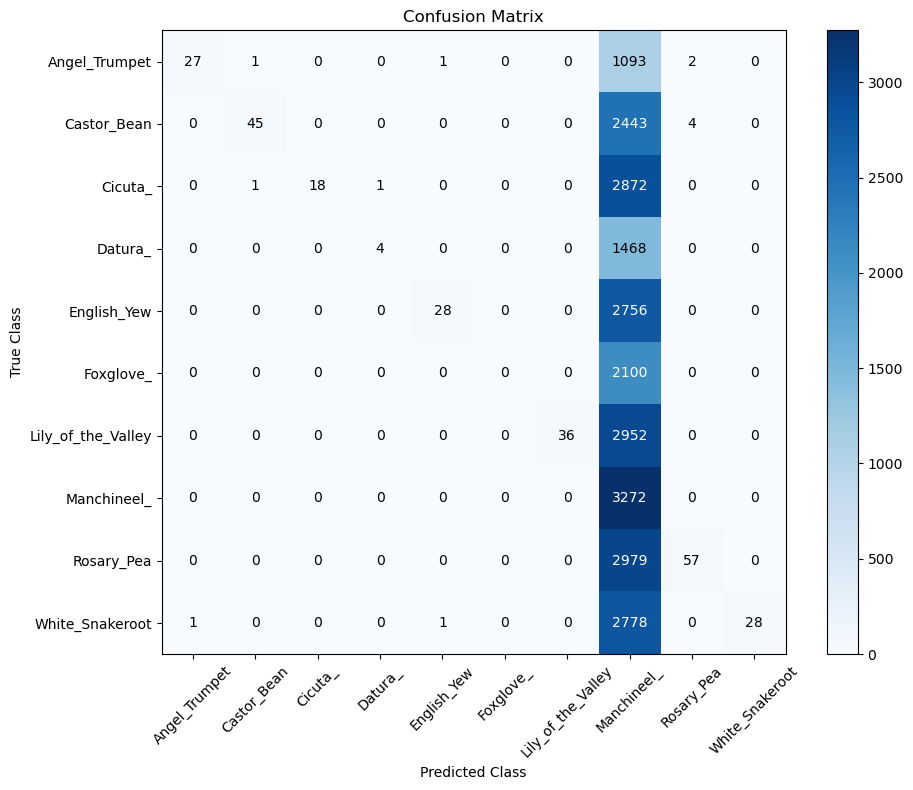

In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Define the path to your dataset
dataset_path = 'Rotated_Plants_Dataset_Copy'

# Extract class names from folder names, excluding .DS_Store
class_names = sorted([folder for folder in os.listdir(dataset_path) if not folder.startswith('.')])

# Initialize number of folds
n_folds = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store true and predicted labels for each fold
true_labels = []
predicted_labels = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(images, labels)):
    print(f"Fold {fold + 1}/{n_folds}")
    
    # Split data into train and test sets for this fold
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict labels for the test data
    y_pred = model.predict(X_test)
    
    # Append true and predicted labels for this fold
    true_labels.extend(y_test)
    predicted_labels.extend(y_pred)

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Convert predicted labels to integers
predicted_labels = np.argmax(predicted_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add class labels to axes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()

Fold 1/3
261/261 [==============================] - 3s 11ms/step
Fold 2/3
261/261 [==============================] - 3s 10ms/step
Fold 3/3
261/261 [==============================] - 3s 11ms/step


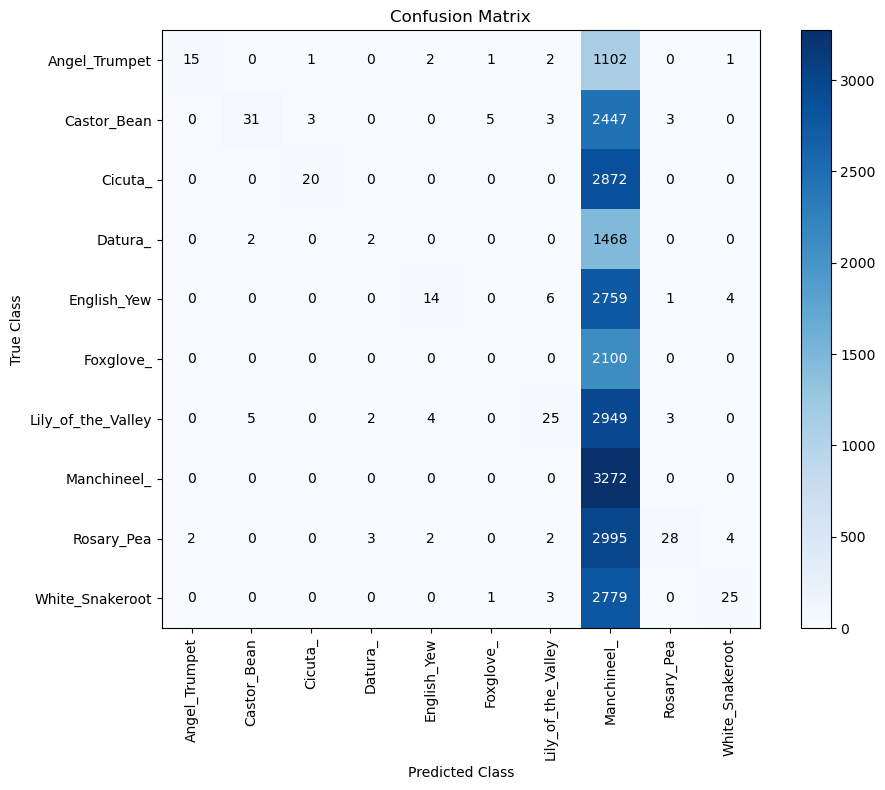

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Define the path to your dataset
dataset_path = 'Rotated_Plants_Dataset_Copy'

# Extract class names from folder names, excluding .DS_Store
class_names = sorted([folder for folder in os.listdir(dataset_path) if not folder.startswith('.')])

# Initialize number of folds
n_folds = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store true and predicted labels for each fold
true_labels = []
predicted_labels = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(images, labels)):
    print(f"Fold {fold + 1}/{n_folds}")
    
    # Split data into train and test sets for this fold
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict labels for the test data
    y_pred = model.predict(X_test)
    
    # Append true and predicted labels for this fold
    true_labels.extend(y_test)
    predicted_labels.extend(y_pred)

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Convert predicted labels to integers
predicted_labels = np.argmax(predicted_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add class labels to axes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()

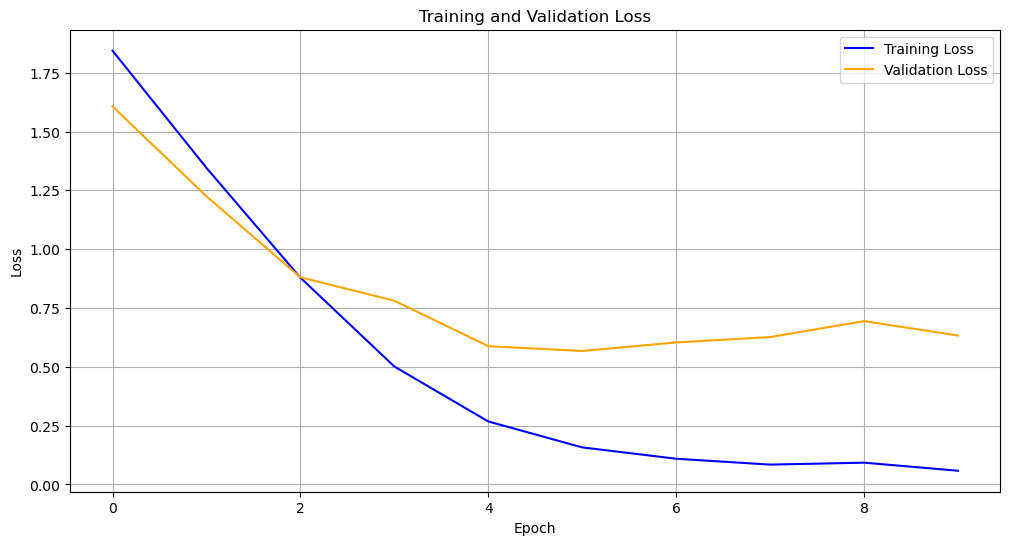

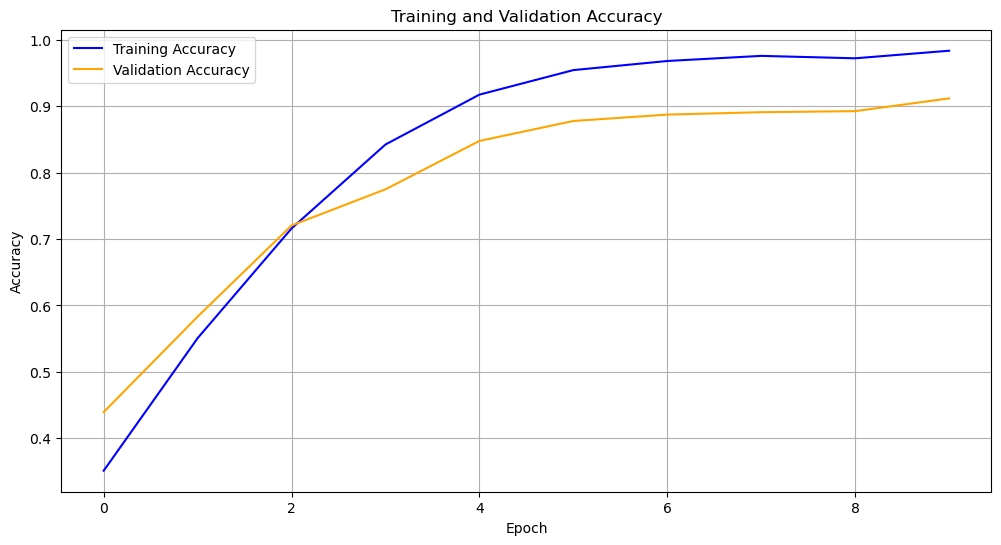

In [49]:
import matplotlib.pyplot as plt

# Assuming you have the following variables available:
# history = model.fit(...) # Training history containing loss and accuracy values

# Extracting loss and accuracy values from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
